In [7]:
# Connexion base de données et chargement des données
import os
import pandas as pd
from dotenv import load_dotenv
from sqlalchemy import create_engine, URL

# Charger les variables d'environnement
load_dotenv()

# Création URL avec SQLAlchemy
POSTGRES_URI = URL.create(
    drivername="postgresql+psycopg2",
    username=os.environ.get('DB_USER'),
    password=os.environ.get('DB_PASSWORD'),
    host=os.environ.get('DB_HOST'),
    port=os.environ.get('DB_PORT', 5432),
    database=os.environ.get('DB_NAME')
)

# Connexion à la base PostgreSQL
engine = create_engine(POSTGRES_URI)
conn = engine.connect()

# Charger les tables en DataFrames
df_clients = pd.read_sql("SELECT * FROM steve.clients", conn)
df_factures = pd.read_sql("SELECT * FROM steve.factures", conn)
df_factures_produits = pd.read_sql("SELECT * FROM steve.factures_produits", conn)

# Fermer la connexion
conn.close()

# Vérifier les données
df_clients.head(), df_factures.head(), df_factures_produits.head()

(                nom                      mail date_de_naissance sexe  \
 0    Kimberly Smith       ihurley@example.com        1994-03-04    M   
 1        Eric Russo  robertssarah@example.org        1985-02-24    M   
 2     Nicole Miller     william72@example.ore        1984-08-19    M   
 3  Michelle Carroll        yblack@example.org        1985-01-16    F   
 4       Tammy Solis      stacey20@example.com        1999-03-20    F   
 
                                              adresse  
 0                    PSC 4165, Box 4117, APOAE 79315  
 1  51410 Gabrielle Knolls Apt. 741, South Todd, N...  
 2  12125 Bell Greens Apt. 830, ‘ristanmouth, WV 1...  
 3    9290 Ann Drives Apt. 242, Danielsland, MD 06542  
 4    9614 Cook Shores Suite 908, West Lisa, OK 18569  ,
   numero_facture       creation_date    total                        mail
 0  FAC/2018/0001 2018-10-13 03:27:00  1146.84        ashley38@example.org
 1  FAC/2018/0002 2018-10-17 13:37:00   182.80          ameyer@example.co

In [3]:
df_clients.head()

,nom,mail,date_de_naissance,sexe,adresse
0,Kimberly Smith,ihurley@example.com,1994-03-04,M,"PSC 4165, Box 4117, APOAE 79315"
1,Eric Russo,robertssarah@example.org,1985-02-24,M,"51410 Gabrielle Knolls Apt. 741, South Todd, N..."
2,Nicole Miller,william72@example.ore,1984-08-19,M,"12125 Bell Greens Apt. 830, ‘ristanmouth, WV 1..."
3,Michelle Carroll,yblack@example.org,1985-01-16,F,"9290 Ann Drives Apt. 242, Danielsland, MD 06542"
4,Tammy Solis,stacey20@example.com,1999-03-20,F,"9614 Cook Shores Suite 908, West Lisa, OK 18569"


In [4]:
df_factures.head()

,numero_facture,creation_date,total,mail
0,FAC/2018/0001,2018-10-13 03:27:00,1146.84,ashley38@example.org
1,FAC/2018/0002,2018-10-17 13:37:00,182.80,ameyer@example.com
2,FAC/2018/0003,2018-11-03 23:58:00,152.98,phughes@example.com
3,FAC/2018/0005,2018-11-17 18:13:00,74.84,patriciakelley@example.ore
4,FAC/2018/0007,2018-12-01 12:59:00,21.90,alan48@example.org


In [5]:
df_factures_produits.head()

,id,numero_facture,produit,quantité,prix_unitaire
0,1,FAC/2018/0001,Edge so crime share,4,12.18
1,2,FAC/2018/0001,Thank do article especially,1,67.86
2,3,FAC/2018/0001,Include dinner main friend,3,287.99
3,4,FAC/2018/0001,Capital hear moming people,3,55.43
4,5,FAC/2018/0002,Between everybody size conference,4,45.70


In [11]:
# Analyse des Ventes Mensuelles
df_factures['creation_date'] = pd.to_datetime(df_factures['creation_date'])
ventes_mensuelles = df_factures.groupby(df_factures['creation_date'].dt.to_period('M'))['total'].sum()

# Afficher les résultats
ventes_mensuelles

creation_date
2018-10     1329.64
2018-11      227.82
2018-12    28295.81
2019-01    39258.45
2019-02    54313.82
             ...   
2024-08    41926.46
2024-09    36255.05
2024-10    54742.59
2024-11    30445.19
2024-12    41543.55
Freq: M, Name: total, Length: 75, dtype: float64

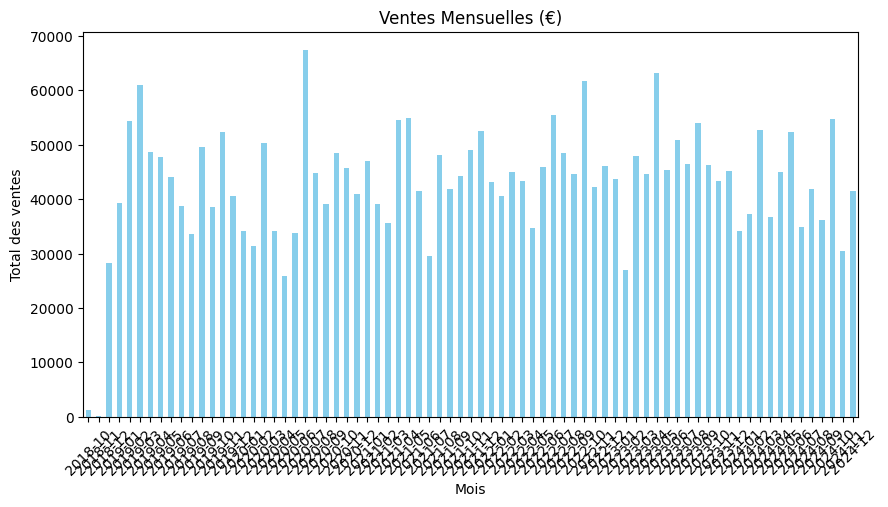

In [12]:
# Visualisation des ventes mensuelles
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
ventes_mensuelles.plot(kind='bar', color='skyblue')
plt.title("Ventes Mensuelles (€)")
plt.xlabel("Mois")
plt.ylabel("Total des ventes")
plt.xticks(rotation=45)
plt.show()

In [15]:
# Top 5 des clients les plus rentables
clients_rentables = df_factures.groupby("mail")["total"].sum().sort_values(ascending=False)
clients_rentables.head(5)

mail
gonzalesbarbara@examplenet    18544.41
aliciapowers@example.com      17532.26
hickmancrystal@example.com    15824.40
jenniferflores@example.net    15184.26
yerujillo@example.net         14794.98
Name: total, dtype: float64

In [16]:
# Produits les plus vendus
produits_populaires = df_factures_produits.groupby("produit")["quantité"].sum().sort_values(ascending=False)
produits_populaires.head(5)

produit
West true will quite                  242
Season environmental remember book    223
Available soldier dog spring          221
Factor again trouble use              206
Gun forget small spend                200
Name: quantité, dtype: int64

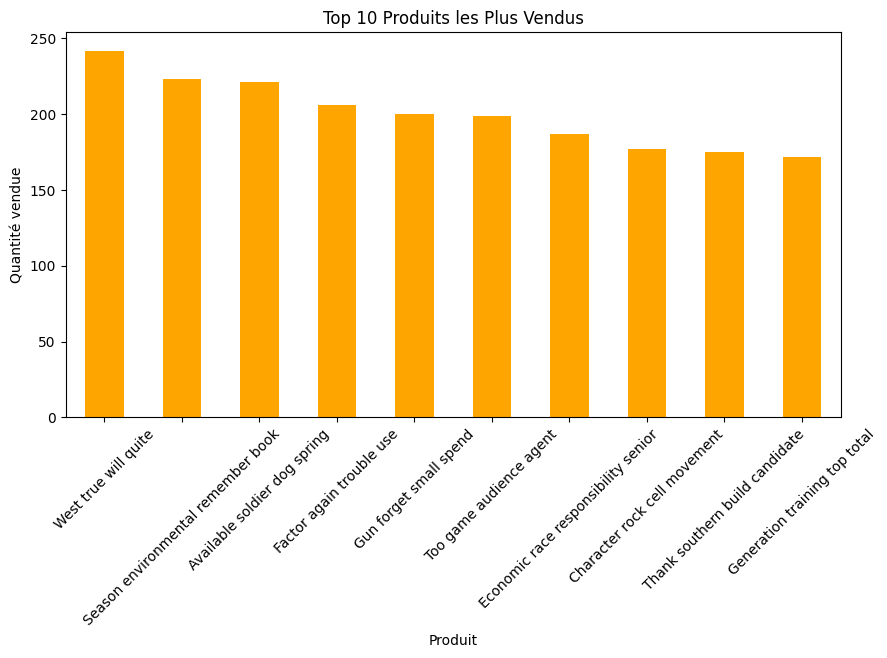

In [17]:
# Visualisation des produits les plus vendus
plt.figure(figsize=(10,5))
produits_populaires.head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Produits les Plus Vendus")
plt.xlabel("Produit")
plt.ylabel("Quantité vendue")
plt.xticks(rotation=45)
plt.show()